## Import

In [1]:
library(ggplot2)
library(ggprism)
library(gplots)
library(here)
library(loomR)
library(Seurat)
library(SeuratDisk)
library(tidyverse)
library(viridis)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


here() starts at /Users/shao/Library/CloudStorage/OneDrive-Personal/PythonScripts/Experiment Project/GitHub/scRNA co-expression correlation

Loading required package: R6

Loading required package: hdf5r

Attaching SeuratObject

Attaching sp

Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat


Attaching package: ‘SeuratDisk’


The following object is masked from ‘package:loomR’:

    loom


── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
✔ purrr   0.3.5      
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() 

## Setup the Seurat object from loom

In [2]:
filename <- ("~/Documents/RNA-seq Data/Mouse nervous system loom/L6_Neurons.loom")
filename

[1] "~/Documents/RNA-seq Data/Mouse nervous system loom/L6_Neurons.loom"

In [3]:
# Load the seu dataset
seu.loom <- Connect(filename, mode = "r")
seu.loom

Class: loom
Filename: /Users/shao/Documents/RNA-seq Data/Mouse nervous system loom/L6_Neurons.loom
Access type: H5F_ACC_RDONLY
Attributes: CreationDate, last_modified
Listing:
       name    obj_type  dataset.dims dataset.type_class
  col_attrs   H5I_GROUP          <NA>               <NA>
 col_graphs   H5I_GROUP          <NA>               <NA>
     layers   H5I_GROUP          <NA>               <NA>
     matrix H5I_DATASET 74539 x 27998          H5T_FLOAT
  row_attrs   H5I_GROUP          <NA>               <NA>
 row_graphs   H5I_GROUP          <NA>               <NA>

In [4]:
seu <- as.Seurat(seu.loom)
seu

Warning message:
“Cannot find version information in this loom file, assuming to be 0.1.0”
Reading in /matrix

Warning message:
“Duplicate feature names found, making unique”
Warning message:
“Duplicate feature names found, making unique”
Storing /matrix as counts

Saving /matrix to assay 'RNA'

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is AgeAnalysisPoolAnalysisProjectBucketCellConcCell_ConcChipIDClassClassProbability_AstrocyteClassProbability_Astrocyte.ImmuneClassProbability_Astrocyte.NeuronsClassProbability_Astrocyte.OligosClassProbability_Astrocyte.VascularClassProbability_Bergmann.gliaClassProbability_BloodClassProbability_Blood.VascularClassProbability_Enteric.gliaClassProbability_Enteric.glia.CyclingClassProbability_EpendymalClassProbability_Ex.NeuronsClassProbability_Ex.VascularClassProbability_ImmuneClassProbability_Immune.NeuronsClassProbability_Immune.OligosClassProbability_NeuronsClassProbability_Neurons.CyclingClassPro

An object of class Seurat 
27998 features across 74539 samples within 1 assay 
Active assay: RNA (27998 features, 0 variable features)

In [5]:
colnames(seu@meta.data)

[1] "orig.ident"                                    
  [2] "nCount_RNA"                                    
  [3] "nFeature_RNA"                                  
  [4] "Age"                                           
  [5] "AnalysisPool"                                  
  [6] "AnalysisProject"                               
  [7] "Bucket"                                        
  [8] "CellConc"                                      
  [9] "Cell_Conc"                                     
 [10] "ChipID"                                        
 [11] "Class"                                         
 [12] "ClassProbability_Astrocyte"                    
 [13] "ClassProbability_Astrocyte.Immune"             
 [14] "ClassProbability_Astrocyte.Neurons"            
 [15] "ClassProbability_Astrocyte.Oligos"             
 [16] "ClassProbability_Astrocyte.Vascular"           
 [17] "ClassProbability_Bergmann.glia"                
 [18] "ClassProbability_Blood"                        
 [19] "ClassProbability_Blood.Vascular"               
 [20] "ClassProbability_Enteric.glia"                 
 [21] "ClassProbability_Enteric.glia.Cycling"         
 [22] "ClassProbability_Ependymal"                    
 [23] "ClassProbability_Ex.Neurons"                   
 [24] "ClassProbability_Ex.Vascular"                  
 [25] "ClassProbability_Immune"                       
 [26] "ClassProbability_Immune.Neurons"               
 [27] "ClassProbability_Immune.Oligos"                
 [28] "ClassProbability_Neurons"                      
 [29] "ClassProbability_Neurons.Cycling"              
 [30] "ClassProbability_Neurons.Oligos"               
 [31] "ClassProbability_Neurons.Satellite.glia"       
 [32] "ClassProbability_Neurons.Vascular"             
 [33] "ClassProbability_OEC"                          
 [34] "ClassProbability_Oligos"                       
 [35] "ClassProbability_Oligos.Cycling"               
 [36] "ClassProbability_Oligos.Vascular"              
 [37] "ClassProbability_Satellite.glia"               
 [38] "ClassProbability_Satellite.glia.Cycling"       
 [39] "ClassProbability_Satellite.glia.Schwann"       
 [40] "ClassProbability_Schwann"                      
 [41] "ClassProbability_Ttr"                          
 [42] "ClassProbability_Vascular"                     
 [43] "ClusterName"                                   
 [44] "Clusters"                                      
 [45] "Comment"                                       
 [46] "Comments"                                      
 [47] "DateCaptured"                                  
 [48] "Date_Captured"                                 
 [49] "Description"                                   
 [50] "Developmental_compartment"                     
 [51] "DonorID"                                       
 [52] "Estimated.Number.of.Cells"                     
 [53] "Flowcell"                                      
 [54] "Fraction.Reads.in.Cells"                       
 [55] "Label"                                         
 [56] "LeafOrder"                                     
 [57] "Location_based_on"                             
 [58] "Mean.Reads.per.Cell"                           
 [59] "Median.Genes.per.Cell"                         
 [60] "Median.UMI.Counts.per.Cell"                    
 [61] "MitoRiboRatio"                                 
 [62] "NGI_PlateWell"                                 
 [63] "Neurotransmitter"                              
 [64] "NumPooledAnimals"                              
 [65] "Num_Pooled_Animals"                            
 [66] "Number.of.Reads"                               
 [67] "OriginalClusters"                              
 [68] "Outliers"                                      
 [69] "PCRCycles"                                     
 [70] "PCR_Cycles"                                    
 [71] "PassedQC"                                      
 [72] "PlugDate"                                      
 [73] "Plug_Date"                         

In [6]:
unique(seu@meta.data$Class)

[1] "Neurons"

In [7]:
unique(seu@meta.data$ClusterName)

[1] "HBSER4"  "HBSER5"  "HBSER3"  "HBSER1"  "HBSER2"  "HYPEP7"  "TECHO"  
  [8] "DECHO1"  "CBPC"    "MEINH1"  "CBINH1"  "CBINH2"  "TEINH18" "TEINH17"
 [15] "DEINH2"  "DEINH1"  "MEINH10" "MEINH9"  "MEINH11" "MEINH6"  "MEINH5" 
 [22] "MEINH7"  "MEINH12" "MEINH4"  "MEINH3"  "MEINH2"  "DEINH3"  "TEINH1" 
 [29] "DEINH6"  "MEINH8"  "MEINH13" "TEINH3"  "DEINH5"  "TEINH2"  "DEINH4" 
 [36] "SCINH11" "HBINH1"  "HBINH3"  "HBINH4"  "HBINH7"  "HBINH5"  "HBINH6" 
 [43] "HBINH2"  "SCINH1"  "HBINH8"  "SCINH3"  "SCINH4"  "HBINH9"  "SCINH2" 
 [50] "SCINH10" "SCINH9"  "SCINH8"  "SCINH7"  "SCINH6"  "SCINH5"  "HYPEP6" 
 [57] "HYPEP5"  "HYPEP4"  "DECHO2"  "MEGLU14" "MBDOP1"  "DEINH8"  "DEINH7" 
 [64] "HYPEP2"  "HYPEP1"  "SEPNBL"  "CBNBL1"  "CBNBL2"  "CBGRC"   "CR"     
 [71] "DGGRC1"  "DGGRC2"  "TEGLU6"  "DETPH"   "OBNBL2"  "OBNBL1"  "OBINH4" 
 [78] "OBNBL4"  "OBNBL5"  "OBDOP2"  "OBINH2"  "OBINH3"  "OBINH1"  "OBDOP1" 
 [85] "DGNBL1"  "DGNBL2"  "OBNBL3"  "SZNBL"   "HYPEP8"  "MSN6"    "MSN4"   
 [92] "MSN5"    "MSN1"    "MSN2"    "MSN3"    "DEGLU1"  "DEGLU2"  "DEGLU3" 
 [99] "HBNOR"   "HBGLU10" "HBGLU3"  "HBGLU2"  "HBGLU9"  "DEGLU4"  "MBCHO1" 
[106] "HBCHO4"  "MEGLU11" "MEGLU10" "MEGLU9"  "MEGLU8"  "MEGLU7"  "MEGLU4" 
[113] "MEGLU5"  "MEGLU1"  "MEGLU3"  "DEGLU5"  "MEGLU6"  "SCGLU1"  "HYPEP3" 
[120] "MEGLU2"  "MEINH14" "SCGLU5"  "SCGLU7"  "SCGLU6"  "SCGLU9"  "SCGLU4" 
[127] "SCGLU3"  "SCGLU2"  "SCGLU10" "SCGLU8"  "MBDOP2"  "HBADR"   "HBCHO3" 
[134] "HBGLU1"  "HBCHO1"  "HBCHO2"  "HBGLU4"  "HBGLU5"  "HBGLU7"  "HBGLU6" 
[141] "HBGLU8"  "TEINH10" "TEINH11" "TEINH12" "TEINH9"  "TEINH4"  "TEINH8" 
[148] "TEINH7"  "TEINH6"  "TEINH5"  "OBINH5"  "TEINH16" "TEINH15" "TEINH14"
[155] "TEINH13" "TEINH20" "TEINH19" "TEINH21" "TEGLU2"  "TEGLU3"  "TEGLU1" 
[162] "TEGLU12" "TEGLU11" "TEGLU10" "TEGLU9"  "TEGLU8"  "TEGLU7"  "TEGLU15"
[169] "TEGLU5"  "TEGLU16" "TEGLU4"  "TEGLU13" "TEGLU17" "TEGLU22" "TEGLU19"
[176] "TEGLU18" "TEGLU20" "TEGLU21" "TEGLU14" "TEGLU24" "TEGLU23" "PSNP6"  
[183] "PSNP4"   "PSNP5"   "PSNP2"   "PSNP3"   "PSNP1"   "PSNF1"   "PSNF3"  
[190] "PSNF2"   "PSPEP8"  "PSPEP7"  "PSPEP6"  "PSPEP5"  "PSPEP4"  "PSPEP3" 
[197] "PSPEP2"  "PSPEP1"  "SYCHO1"  "SYCHO2"  "SYNOR5"  "SYNOR4"  "SYNOR1" 
[204] "SYNOR2"  "SYNOR3"  "ENT6"    "ENT5"    "ENT4"    "ENT2"    "ENT3"   
[211] "ENT1"    "ENT7"    "ENT8"    "ENT9"

In [8]:
head(seu@assays$RNA@data)

   [[ suppressing 34 column names ‘10X55_3_CGGGTTCGCCTGTT-’, ‘10X54_4_AGAAATCAAAGTAG-’, ‘10X55_8_CTCCTGTTTGTGTG-’ ... ]]



6 x 74539 sparse Matrix of class "dgCMatrix"
                                                                               
Pgr15l 7 4 2  . 8  6 7 1 6 5 1 5  7 4  7 9  2 .  1  8 8  9  5 6 .  6  5  6 13 3
Nkx6-1 3 4 2  2 2  4 . 1 2 3 . 1  2 .  1 3  . .  .  2 6  4  2 1 3  3  .  1  2 1
Irs4   3 3 5  1 2 14 8 2 9 6 3 .  4 5  3 7  3 7  2  7 4  9  3 3 3  3 17 13 11 9
Asah2  1 2 .  . .  . . . . 2 . .  . 2  . 1  . 1  1  1 .  .  2 . .  1  1  .  . 1
Peg10  7 6 2 36 9 10 8 . 3 7 2 . 71 . 30 3 18 . 11 31 8 13 16 8 . 20 15  1 12 3
Fndc9  . . .  2 1  . . 1 1 . . .  1 .  1 .  1 .  1  . 2  1  . . .  .  1  .  1 .
                     
Pgr15l 5 4 . 3 ......
Nkx6-1 1 1 3 . ......
Irs4   1 4 6 2 ......
Asah2  . . 1 . ......
Peg10  8 9 . . ......
Fndc9  . 2 1 . ......

 .....suppressing 74505 columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

In [9]:
seu@assays$RNA@data <- seu@assays$RNA@counts

In [10]:
colnames(seu@meta.data)

[1] "orig.ident"                                    
  [2] "nCount_RNA"                                    
  [3] "nFeature_RNA"                                  
  [4] "Age"                                           
  [5] "AnalysisPool"                                  
  [6] "AnalysisProject"                               
  [7] "Bucket"                                        
  [8] "CellConc"                                      
  [9] "Cell_Conc"                                     
 [10] "ChipID"                                        
 [11] "Class"                                         
 [12] "ClassProbability_Astrocyte"                    
 [13] "ClassProbability_Astrocyte.Immune"             
 [14] "ClassProbability_Astrocyte.Neurons"            
 [15] "ClassProbability_Astrocyte.Oligos"             
 [16] "ClassProbability_Astrocyte.Vascular"           
 [17] "ClassProbability_Bergmann.glia"                
 [18] "ClassProbability_Blood"                        
 [19] "ClassProbability_Blood.Vascular"               
 [20] "ClassProbability_Enteric.glia"                 
 [21] "ClassProbability_Enteric.glia.Cycling"         
 [22] "ClassProbability_Ependymal"                    
 [23] "ClassProbability_Ex.Neurons"                   
 [24] "ClassProbability_Ex.Vascular"                  
 [25] "ClassProbability_Immune"                       
 [26] "ClassProbability_Immune.Neurons"               
 [27] "ClassProbability_Immune.Oligos"                
 [28] "ClassProbability_Neurons"                      
 [29] "ClassProbability_Neurons.Cycling"              
 [30] "ClassProbability_Neurons.Oligos"               
 [31] "ClassProbability_Neurons.Satellite.glia"       
 [32] "ClassProbability_Neurons.Vascular"             
 [33] "ClassProbability_OEC"                          
 [34] "ClassProbability_Oligos"                       
 [35] "ClassProbability_Oligos.Cycling"               
 [36] "ClassProbability_Oligos.Vascular"              
 [37] "ClassProbability_Satellite.glia"               
 [38] "ClassProbability_Satellite.glia.Cycling"       
 [39] "ClassProbability_Satellite.glia.Schwann"       
 [40] "ClassProbability_Schwann"                      
 [41] "ClassProbability_Ttr"                          
 [42] "ClassProbability_Vascular"                     
 [43] "ClusterName"                                   
 [44] "Clusters"                                      
 [45] "Comment"                                       
 [46] "Comments"                                      
 [47] "DateCaptured"                                  
 [48] "Date_Captured"                                 
 [49] "Description"                                   
 [50] "Developmental_compartment"                     
 [51] "DonorID"                                       
 [52] "Estimated.Number.of.Cells"                     
 [53] "Flowcell"                                      
 [54] "Fraction.Reads.in.Cells"                       
 [55] "Label"                                         
 [56] "LeafOrder"                                     
 [57] "Location_based_on"                             
 [58] "Mean.Reads.per.Cell"                           
 [59] "Median.Genes.per.Cell"                         
 [60] "Median.UMI.Counts.per.Cell"                    
 [61] "MitoRiboRatio"                                 
 [62] "NGI_PlateWell"                                 
 [63] "Neurotransmitter"                              
 [64] "NumPooledAnimals"                              
 [65] "Num_Pooled_Animals"                            
 [66] "Number.of.Reads"                               
 [67] "OriginalClusters"                              
 [68] "Outliers"                                      
 [69] "PCRCycles"                                     
 [70] "PCR_Cycles"                                    
 [71] "PassedQC"                                      
 [72] "PlugDate"                                      
 [73] "Plug_Date"                         

## Save object

In [11]:
head(seu@assays$RNA@data)

   [[ suppressing 34 column names ‘10X55_3_CGGGTTCGCCTGTT-’, ‘10X54_4_AGAAATCAAAGTAG-’, ‘10X55_8_CTCCTGTTTGTGTG-’ ... ]]



6 x 74539 sparse Matrix of class "dgCMatrix"
                                                                               
Pgr15l 7 4 2  . 8  6 7 1 6 5 1 5  7 4  7 9  2 .  1  8 8  9  5 6 .  6  5  6 13 3
Nkx6-1 3 4 2  2 2  4 . 1 2 3 . 1  2 .  1 3  . .  .  2 6  4  2 1 3  3  .  1  2 1
Irs4   3 3 5  1 2 14 8 2 9 6 3 .  4 5  3 7  3 7  2  7 4  9  3 3 3  3 17 13 11 9
Asah2  1 2 .  . .  . . . . 2 . .  . 2  . 1  . 1  1  1 .  .  2 . .  1  1  .  . 1
Peg10  7 6 2 36 9 10 8 . 3 7 2 . 71 . 30 3 18 . 11 31 8 13 16 8 . 20 15  1 12 3
Fndc9  . . .  2 1  . . 1 1 . . .  1 .  1 .  1 .  1  . 2  1  . . .  .  1  .  1 .
                     
Pgr15l 5 4 . 3 ......
Nkx6-1 1 1 3 . ......
Irs4   1 4 6 2 ......
Asah2  . . 1 . ......
Peg10  8 9 . . ......
Fndc9  . 2 1 . ......

 .....suppressing 74505 columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

In [12]:
colnames(seu@meta.data)

[1] "orig.ident"                                    
  [2] "nCount_RNA"                                    
  [3] "nFeature_RNA"                                  
  [4] "Age"                                           
  [5] "AnalysisPool"                                  
  [6] "AnalysisProject"                               
  [7] "Bucket"                                        
  [8] "CellConc"                                      
  [9] "Cell_Conc"                                     
 [10] "ChipID"                                        
 [11] "Class"                                         
 [12] "ClassProbability_Astrocyte"                    
 [13] "ClassProbability_Astrocyte.Immune"             
 [14] "ClassProbability_Astrocyte.Neurons"            
 [15] "ClassProbability_Astrocyte.Oligos"             
 [16] "ClassProbability_Astrocyte.Vascular"           
 [17] "ClassProbability_Bergmann.glia"                
 [18] "ClassProbability_Blood"                        
 [19] "ClassProbability_Blood.Vascular"               
 [20] "ClassProbability_Enteric.glia"                 
 [21] "ClassProbability_Enteric.glia.Cycling"         
 [22] "ClassProbability_Ependymal"                    
 [23] "ClassProbability_Ex.Neurons"                   
 [24] "ClassProbability_Ex.Vascular"                  
 [25] "ClassProbability_Immune"                       
 [26] "ClassProbability_Immune.Neurons"               
 [27] "ClassProbability_Immune.Oligos"                
 [28] "ClassProbability_Neurons"                      
 [29] "ClassProbability_Neurons.Cycling"              
 [30] "ClassProbability_Neurons.Oligos"               
 [31] "ClassProbability_Neurons.Satellite.glia"       
 [32] "ClassProbability_Neurons.Vascular"             
 [33] "ClassProbability_OEC"                          
 [34] "ClassProbability_Oligos"                       
 [35] "ClassProbability_Oligos.Cycling"               
 [36] "ClassProbability_Oligos.Vascular"              
 [37] "ClassProbability_Satellite.glia"               
 [38] "ClassProbability_Satellite.glia.Cycling"       
 [39] "ClassProbability_Satellite.glia.Schwann"       
 [40] "ClassProbability_Schwann"                      
 [41] "ClassProbability_Ttr"                          
 [42] "ClassProbability_Vascular"                     
 [43] "ClusterName"                                   
 [44] "Clusters"                                      
 [45] "Comment"                                       
 [46] "Comments"                                      
 [47] "DateCaptured"                                  
 [48] "Date_Captured"                                 
 [49] "Description"                                   
 [50] "Developmental_compartment"                     
 [51] "DonorID"                                       
 [52] "Estimated.Number.of.Cells"                     
 [53] "Flowcell"                                      
 [54] "Fraction.Reads.in.Cells"                       
 [55] "Label"                                         
 [56] "LeafOrder"                                     
 [57] "Location_based_on"                             
 [58] "Mean.Reads.per.Cell"                           
 [59] "Median.Genes.per.Cell"                         
 [60] "Median.UMI.Counts.per.Cell"                    
 [61] "MitoRiboRatio"                                 
 [62] "NGI_PlateWell"                                 
 [63] "Neurotransmitter"                              
 [64] "NumPooledAnimals"                              
 [65] "Num_Pooled_Animals"                            
 [66] "Number.of.Reads"                               
 [67] "OriginalClusters"                              
 [68] "Outliers"                                      
 [69] "PCRCycles"                                     
 [70] "PCR_Cycles"                                    
 [71] "PassedQC"                                      
 [72] "PlugDate"                                      
 [73] "Plug_Date"                         

In [13]:
unique(seu@meta.data$ClusterName)

[1] "HBSER4"  "HBSER5"  "HBSER3"  "HBSER1"  "HBSER2"  "HYPEP7"  "TECHO"  
  [8] "DECHO1"  "CBPC"    "MEINH1"  "CBINH1"  "CBINH2"  "TEINH18" "TEINH17"
 [15] "DEINH2"  "DEINH1"  "MEINH10" "MEINH9"  "MEINH11" "MEINH6"  "MEINH5" 
 [22] "MEINH7"  "MEINH12" "MEINH4"  "MEINH3"  "MEINH2"  "DEINH3"  "TEINH1" 
 [29] "DEINH6"  "MEINH8"  "MEINH13" "TEINH3"  "DEINH5"  "TEINH2"  "DEINH4" 
 [36] "SCINH11" "HBINH1"  "HBINH3"  "HBINH4"  "HBINH7"  "HBINH5"  "HBINH6" 
 [43] "HBINH2"  "SCINH1"  "HBINH8"  "SCINH3"  "SCINH4"  "HBINH9"  "SCINH2" 
 [50] "SCINH10" "SCINH9"  "SCINH8"  "SCINH7"  "SCINH6"  "SCINH5"  "HYPEP6" 
 [57] "HYPEP5"  "HYPEP4"  "DECHO2"  "MEGLU14" "MBDOP1"  "DEINH8"  "DEINH7" 
 [64] "HYPEP2"  "HYPEP1"  "SEPNBL"  "CBNBL1"  "CBNBL2"  "CBGRC"   "CR"     
 [71] "DGGRC1"  "DGGRC2"  "TEGLU6"  "DETPH"   "OBNBL2"  "OBNBL1"  "OBINH4" 
 [78] "OBNBL4"  "OBNBL5"  "OBDOP2"  "OBINH2"  "OBINH3"  "OBINH1"  "OBDOP1" 
 [85] "DGNBL1"  "DGNBL2"  "OBNBL3"  "SZNBL"   "HYPEP8"  "MSN6"    "MSN4"   
 [92] "MSN5"    "MSN1"    "MSN2"    "MSN3"    "DEGLU1"  "DEGLU2"  "DEGLU3" 
 [99] "HBNOR"   "HBGLU10" "HBGLU3"  "HBGLU2"  "HBGLU9"  "DEGLU4"  "MBCHO1" 
[106] "HBCHO4"  "MEGLU11" "MEGLU10" "MEGLU9"  "MEGLU8"  "MEGLU7"  "MEGLU4" 
[113] "MEGLU5"  "MEGLU1"  "MEGLU3"  "DEGLU5"  "MEGLU6"  "SCGLU1"  "HYPEP3" 
[120] "MEGLU2"  "MEINH14" "SCGLU5"  "SCGLU7"  "SCGLU6"  "SCGLU9"  "SCGLU4" 
[127] "SCGLU3"  "SCGLU2"  "SCGLU10" "SCGLU8"  "MBDOP2"  "HBADR"   "HBCHO3" 
[134] "HBGLU1"  "HBCHO1"  "HBCHO2"  "HBGLU4"  "HBGLU5"  "HBGLU7"  "HBGLU6" 
[141] "HBGLU8"  "TEINH10" "TEINH11" "TEINH12" "TEINH9"  "TEINH4"  "TEINH8" 
[148] "TEINH7"  "TEINH6"  "TEINH5"  "OBINH5"  "TEINH16" "TEINH15" "TEINH14"
[155] "TEINH13" "TEINH20" "TEINH19" "TEINH21" "TEGLU2"  "TEGLU3"  "TEGLU1" 
[162] "TEGLU12" "TEGLU11" "TEGLU10" "TEGLU9"  "TEGLU8"  "TEGLU7"  "TEGLU15"
[169] "TEGLU5"  "TEGLU16" "TEGLU4"  "TEGLU13" "TEGLU17" "TEGLU22" "TEGLU19"
[176] "TEGLU18" "TEGLU20" "TEGLU21" "TEGLU14" "TEGLU24" "TEGLU23" "PSNP6"  
[183] "PSNP4"   "PSNP5"   "PSNP2"   "PSNP3"   "PSNP1"   "PSNF1"   "PSNF3"  
[190] "PSNF2"   "PSPEP8"  "PSPEP7"  "PSPEP6"  "PSPEP5"  "PSPEP4"  "PSPEP3" 
[197] "PSPEP2"  "PSPEP1"  "SYCHO1"  "SYCHO2"  "SYNOR5"  "SYNOR4"  "SYNOR1" 
[204] "SYNOR2"  "SYNOR3"  "ENT6"    "ENT5"    "ENT4"    "ENT2"    "ENT3"   
[211] "ENT1"    "ENT7"    "ENT8"    "ENT9"

In [14]:
unique(seu@meta.data$Region)

[1] "Medulla"                                         
 [2] "Pons"                                            
 [3] "Hypothalamus"                                    
 [4] "Striatum dorsal, Striatum ventral,Amygdala"      
 [5] "Cerebellum"                                      
 [6] "Midbrain ventral"                                
 [7] "Hippocampus,Cortex"                              
 [8] "Thalamus"                                        
 [9] "Midbrain dorsal"                                 
[10] "Midbrain dorsal,Midbrain ventral"                
[11] "Pallidum"                                        
[12] "Striatum dorsal, Striatum ventral"               
[13] "Spinal cord"                                     
[14] "Pons,Medullae,Cerebellum"                        
[15] "Dentate gyrus"                                   
[16] "Cortex"                                          
[17] "Olfactory bulb"                                  
[18] "Striatum dorsal, Striatum ventral, Dentate gyrus"
[19] "Striatum ventral"                                
[20] "Striatum dorsal"                                 
[21] "Hippocampus"                                     
[22] "Amygdala"                                        
[23] "Dorsal root ganglion"                            
[24] "Sympathetic ganglion"                            
[25] "Enteric nervous system"

In [ ]:
saveRDS(seu, "neurons.RDS")

In [2]:
seu <- readRDS("D:/RNA-seq Data/Mouse nervous system loom/neurons.RDS")

In [3]:
seu@assays$RNA@data

   [[ suppressing 32 column names '10X55_3_CGGGTTCGCCTGTT-', '10X54_4_AGAAATCAAAGTAG-', '10X55_8_CTCCTGTTTGTGTG-' ... ]]

   [[ suppressing 32 column names '10X55_3_CGGGTTCGCCTGTT-', '10X54_4_AGAAATCAAAGTAG-', '10X55_8_CTCCTGTTTGTGTG-' ... ]]

   [[ suppressing 32 column names '10X55_3_CGGGTTCGCCTGTT-', '10X54_4_AGAAATCAAAGTAG-', '10X55_8_CTCCTGTTTGTGTG-' ... ]]



27998 x 74539 sparse Matrix of class "dgCMatrix"
                                                                                   
Pgr15l        1.9696947 1.6781941 1.4414564 .         2.5138462 2.0969323 2.1205821
Nkx6-1        1.2929825 1.6781941 1.4414564 1.0062623 1.3449741 1.7510714 .        
Irs4          1.2929825 1.4508890 2.2046545 0.6246965 1.3449741 2.8714550 2.2390047
Asah2         0.6319165 1.1562324 .         .         .         .         .        
Peg10         1.9696947 2.0194012 1.4414564 3.4730976 2.6225934 2.5573768 2.2390047
Fndc9         .         .         .         1.0062623 0.8833722 .         .        
Prlr          1.8385278 1.8632804 .         0.6246965 0.8833722 1.2179898 0.7168629
Plch1         .         .         1.4414564 .         0.8833722 0.7839896 1.1301099
Shox2         1.5095845 1.4508890 2.5091086 0.6246965 1.6595854 2.0969323 1.6471177
Htr1a         1.2929825 1.1562324 0.9606611 1.0062623 0.8833722 0.7839896 0.7168629
Slc18a2       4.1381202 3.5

##  Dimensionality reduction and clustering

In [15]:
seu <- NormalizeData(seu, normalization.method = "LogNormalize", scale.factor = 10000)

In [16]:
seu <- FindVariableFeatures(seu, selection.method = "vst", nfeatures = 2000)

In [17]:
# Scaling the data
all.genes <- rownames(seu)
seu <- ScaleData(seu, features = all.genes)

Centering and scaling data matrix



In [18]:
# Perform linear dimensional reduction
seu <- RunPCA(seu, features = VariableFeatures(object = seu))

PC_ 1 
Positive:  Prph, Sncg, Pirt, Tlx2, Anxa2, Tppp3, Tagln2, Fam89a, Pmp22, Cd9 
	   Hspb8, Arpc1b, S100a6, Avil, Msn, Serpinb6a, Anxa5, Lgals1, Ahnak, Ngfr 
	   Ppp1r1c, S100a10, Crip1, Fxyd2, Ahnak2, S100a11, Card19, Ostf1, Ntrk1, Clic1 
Negative:  Arpp21, Pcp4, Nrgn, Mef2c, Camk2n1, Ppp1r1b, Slc17a7, Nrxn3, Neurod1, Lmo4 
	   Kcnk2, Hpca, Gad1, Lmo3, Pantr1, Gpr88, Pcp4l1, Gng7, Enc1, Pde10a 
	   Itpr1, Slc1a2, Cbln3, Shisa8, 3110035E14Rik, Cck, Gabra6, Mhrt, Penk, Gad2 
PC_ 2 
Positive:  mt-Co2, mt-Co3, mt-Atp6, mt-Nd3, Phox2b, Sumo2, Actg1, mt-Nd4l, Rpl23a-ps3, Atp5g2 
	   Crip1, Tm4sf4, Hoxa5, Hand2, Rps12-ps3, Tm4sf1, Gm10073, mt-Atp8, Csrp1, Slc10a4 
	   Plce1, Gm10076, Rpl10-ps3, Phox2a, Tns3, Ifitm2, Chrna3, Pgam1, Slc5a7, Rpl29 
Negative:  Ppp1r1c, Isl2, Tusc5, Scn10a, Acpp, Paqr5, Tmem233, Prdm12, Piezo2, Runx1 
	   Tmem45b, Ostf1, Fxyd2, Tlx3, Pou4f1, Six1, Ahnak2, Nrn1, Scn11a, Cd44 
	   Dok4, Fstl1, Ppm1j, Calcb, Arpc1b, Ctxn3, Lifr, Trim36, Tmem79, Hsbp1l1 
PC_ 3 
Po

PC_ 1 
Positive:  Prph, Sncg, Pirt, Tlx2, Anxa2 
Negative:  Arpp21, Pcp4, Nrgn, Mef2c, Camk2n1 
PC_ 2 
Positive:  mt-Co2, mt-Co3, mt-Atp6, mt-Nd3, Phox2b 
Negative:  Ppp1r1c, Isl2, Tusc5, Scn10a, Acpp 
PC_ 3 
Positive:  Ptma, Igfbpl1, Rplp0, Zbtb20, Tubb2b 
Negative:  Nap1l5, Peg3, Elavl2, Vsnl1, Cplx1 
PC_ 4 
Positive:  Gad1, Gad2, Slc6a1, Slc32a1, Arl4c 
Negative:  Nrgn, Slc17a7, 1110008P14Rik, 3110035E14Rik, Arpp21 
PC_ 5 
Positive:  Slc6a2, Dbh, Hand1, Ntrk1, Gnb3 
Negative:  mt-Co2, mt-Co3, mt-Atp6, mt-Nd3, Hoxa5 


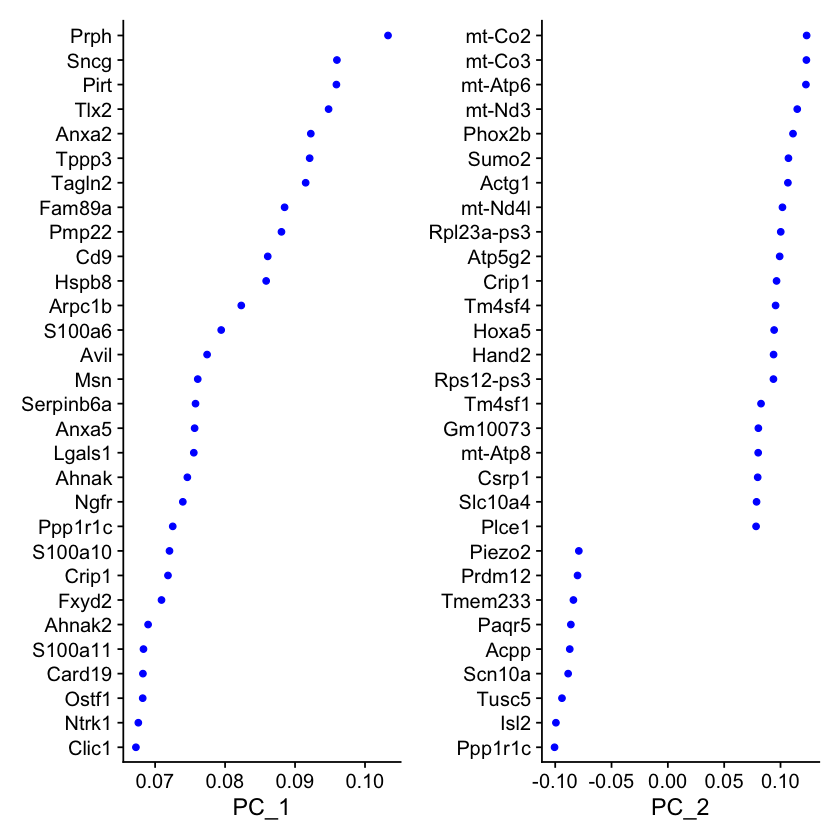

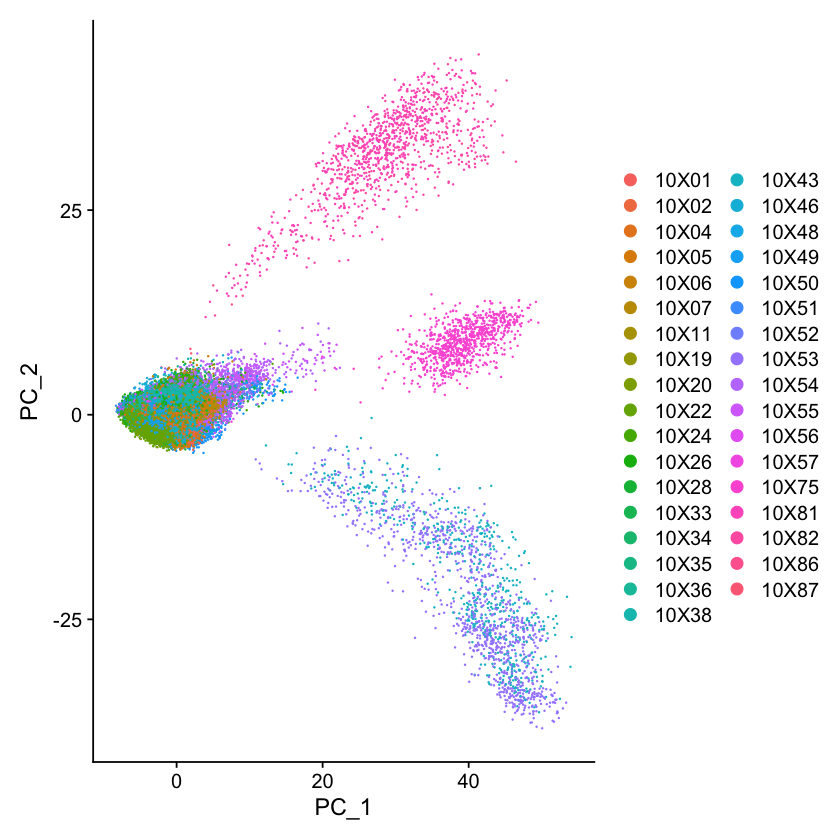

In [19]:
## visualize PCA results a few different ways
print(seu[["pca"]], dims = 1:5, nfeatures = 5)
VizDimLoadings(seu, dims = 1:2, reduction = "pca")
DimPlot(seu, reduction = "pca")

In [20]:
# Cluster the cells
seu <- FindNeighbors(seu, reduction = "pca", dims = 1:30)
seu <- FindClusters(seu, resolution = 0.5)

# Look at cluster IDs of the first 5 cells
head(Idents(seu), 5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 74539
Number of edges: 2871420

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9668
Number of communities: 39
Elapsed time: 72 seconds


10X55_3_CGGGTTCGCCTGTT-  10X54_4_AGAAATCAAAGTAG-  10X55_8_CTCCTGTTTGTGTG- 
                      33                       33                       33 
10X33_2_GTTCAGGAGGTTCA-1  10X54_2_GCTAGAGAGTACAT- 
                      33                       33 
39 Levels: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 ... 38

In [21]:
# Run non-linear dimensional reduction (UMAP/tSNE)
seu <- RunUMAP(seu, reduction = "pca", dims = 1:30)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
10:35:32 UMAP embedding parameters a = 0.9922 b = 1.112

10:35:33 Read 74539 rows and found 30 numeric columns

10:35:33 Using Annoy for neighbor search, n_neighbors = 30

10:35:33 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

10:36:26 Writing NN index file to temp file /var/folders/_p/d0xj9bm96j5_mn_8lvrc6nyc0000gn/T//Rtmpi4dhx9/file106740c9a826

10:36:27 Searching Annoy index using 1 thread, search_k = 3000

10:38:22 Annoy recall = 100%

10:38:30 Commencing smooth kNN distance calibra

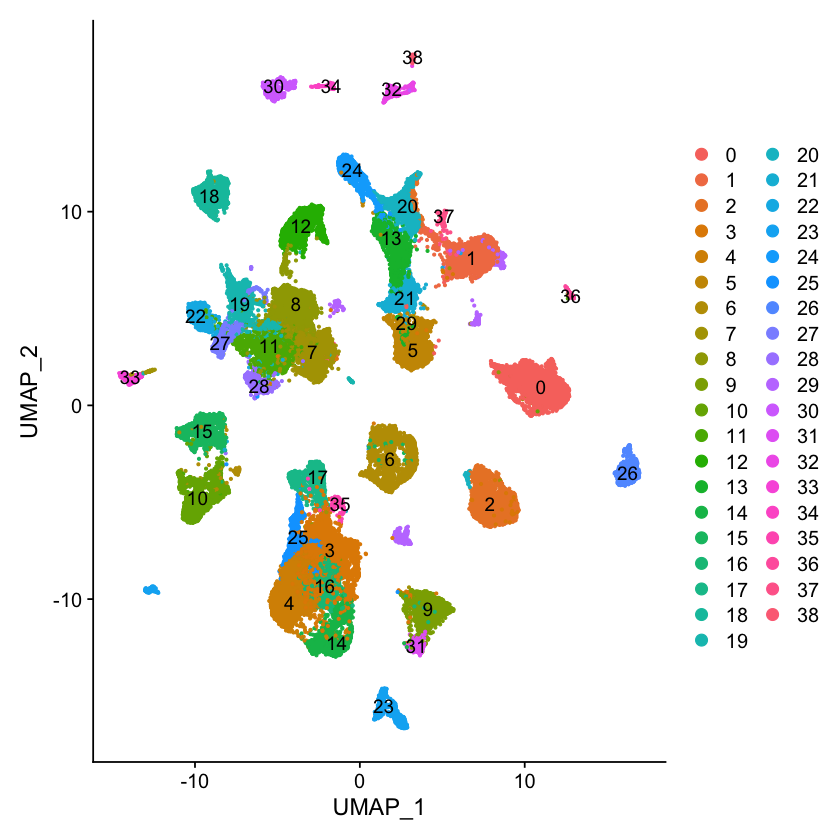

In [22]:
DimPlot(seu, reduction = "umap", pt.size = 0.5, label = TRUE)

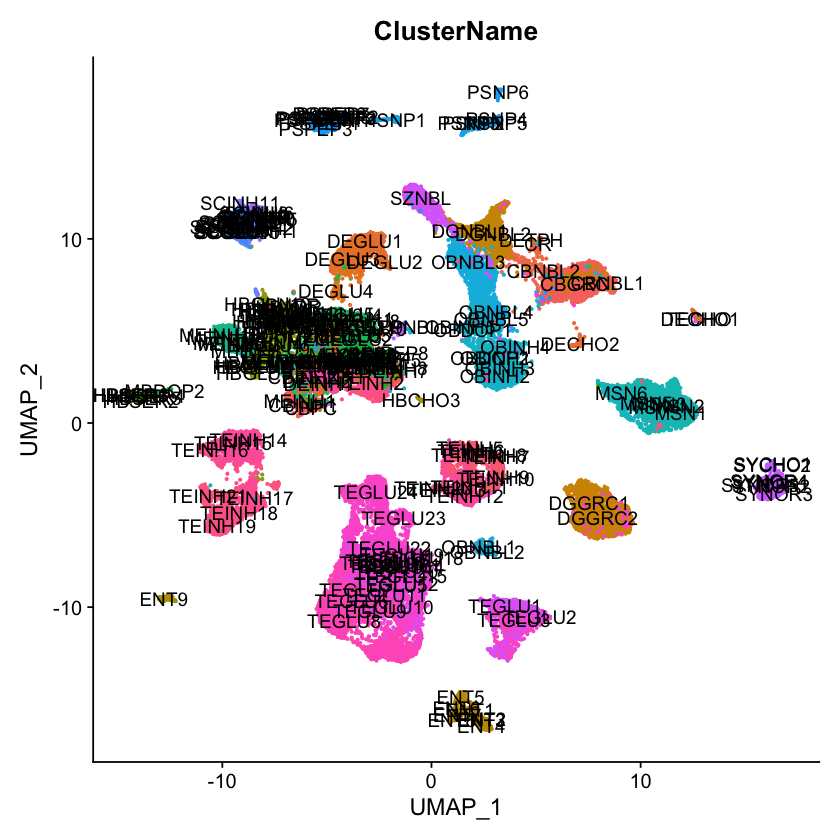

In [23]:
DimPlot(seu, reduction = "umap", group.by = "ClusterName", pt.size = 0.5, label = TRUE) +
    NoLegend()

In [24]:
seu <- RunTSNE(seu, reduction = "pca", dims = 1:30)

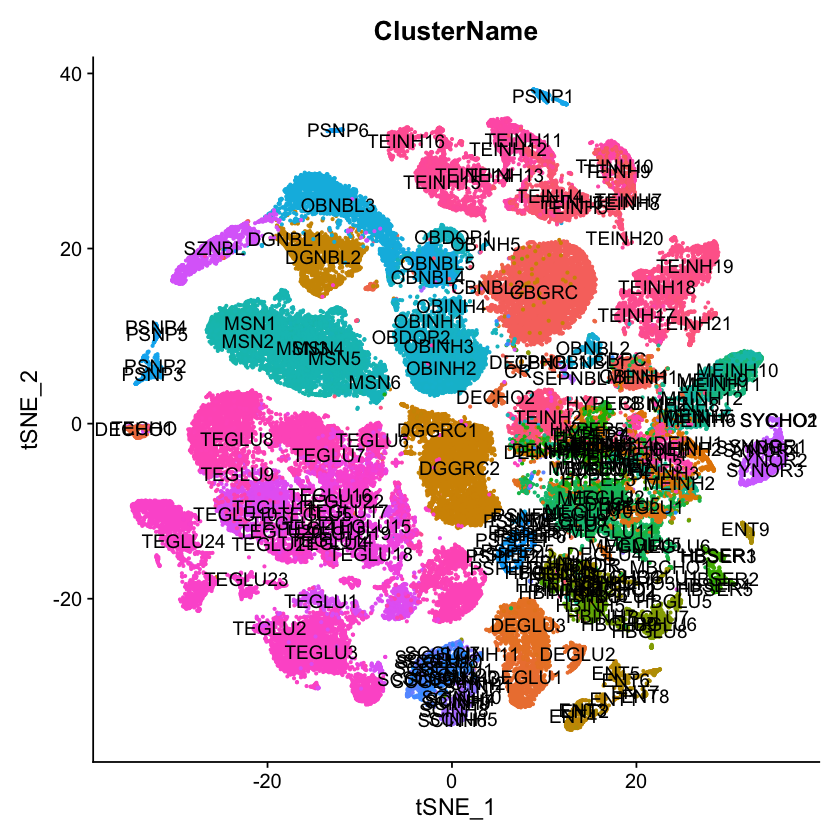

In [25]:
DimPlot(object = seu, reduction = "tsne", group.by = "ClusterName", pt.size = 0.5, label = TRUE) + NoLegend()

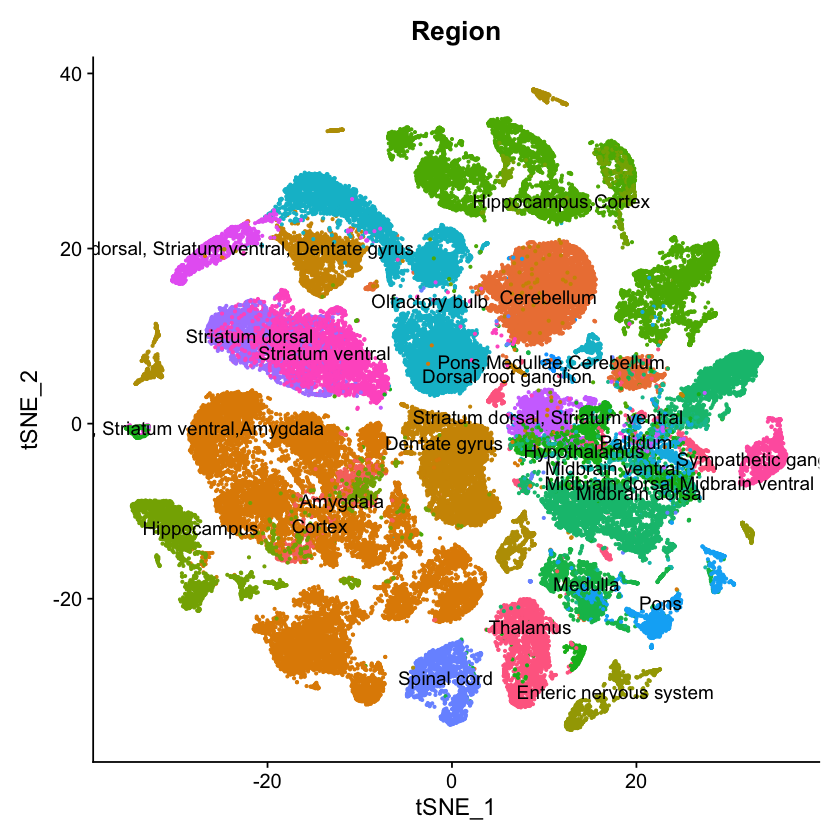

In [26]:
DimPlot(object = seu, reduction = "tsne", group.by = "Region", pt.size = 0.5, label = TRUE) +
    NoLegend()

## Exploring the data


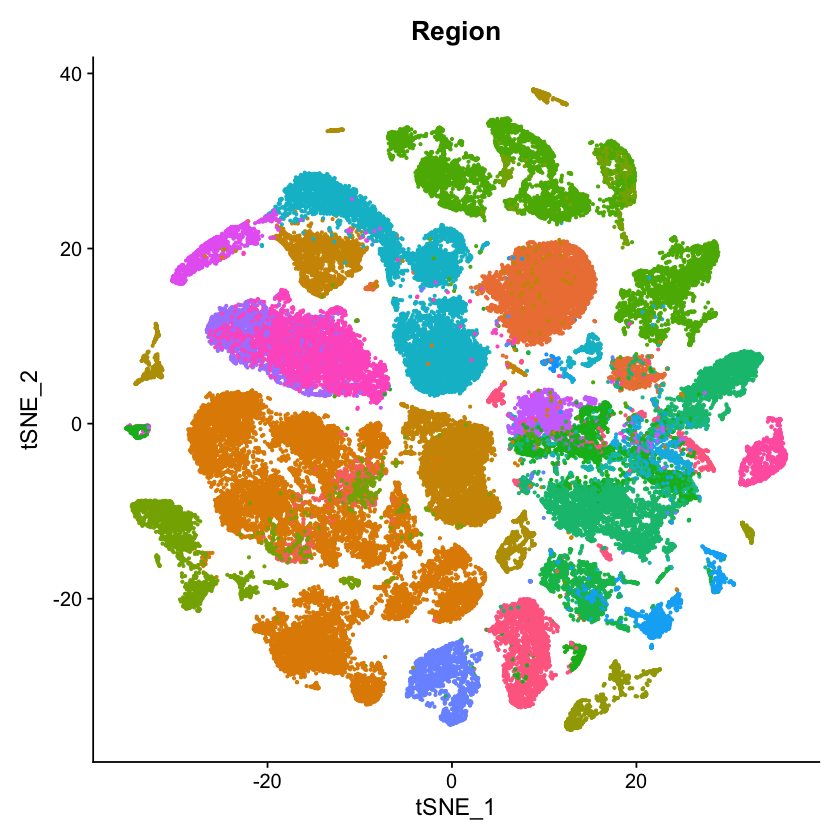

In [31]:
p <- DimPlot(object = seu, reduction = "tsne", group.by = "Region", pt.size = 0.5) +
    NoLegend()
p

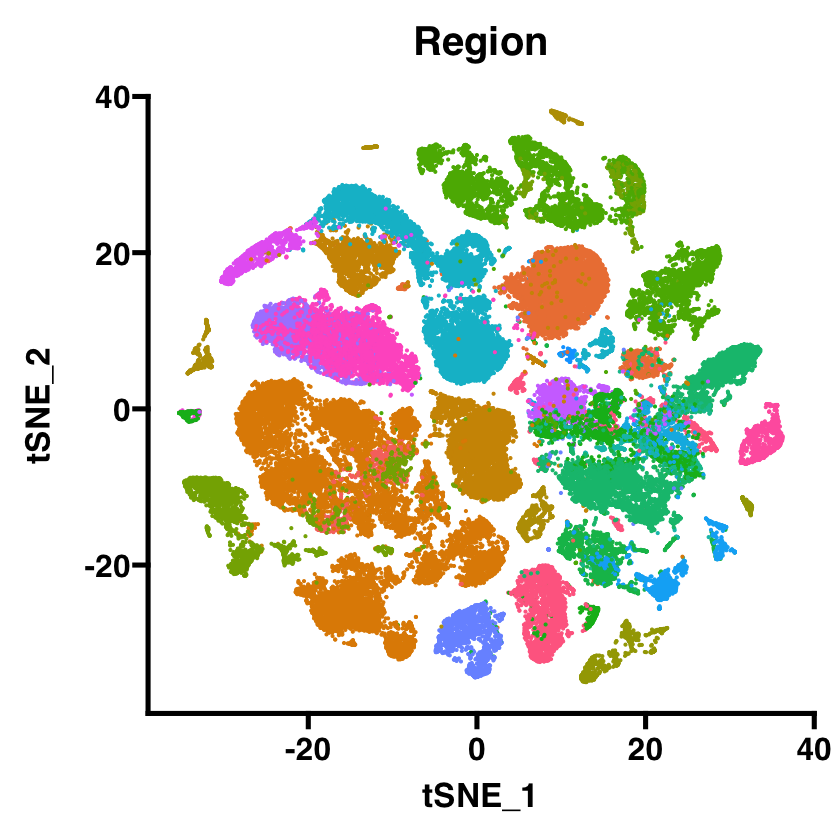

In [32]:
p + theme_prism(base_size = 20) + NoLegend() + scale_x_continuous(limits = c(-39,
    40), expand = c(0, 0)) + scale_y_continuous(limits = c(-39, 40), expand = c(0,
    0))

[[1]]

[[2]]


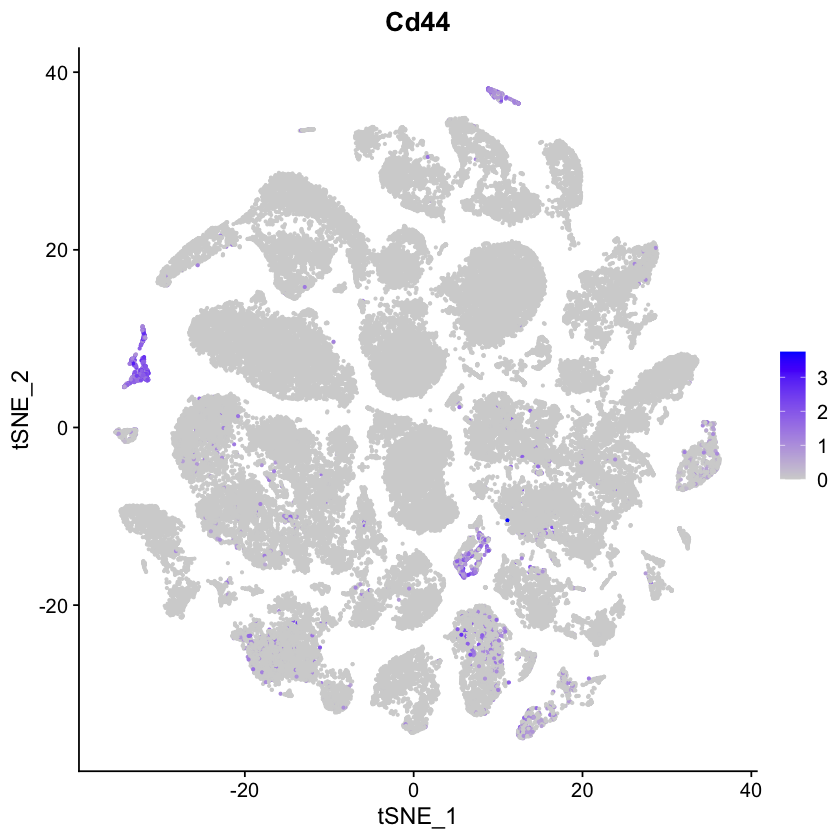

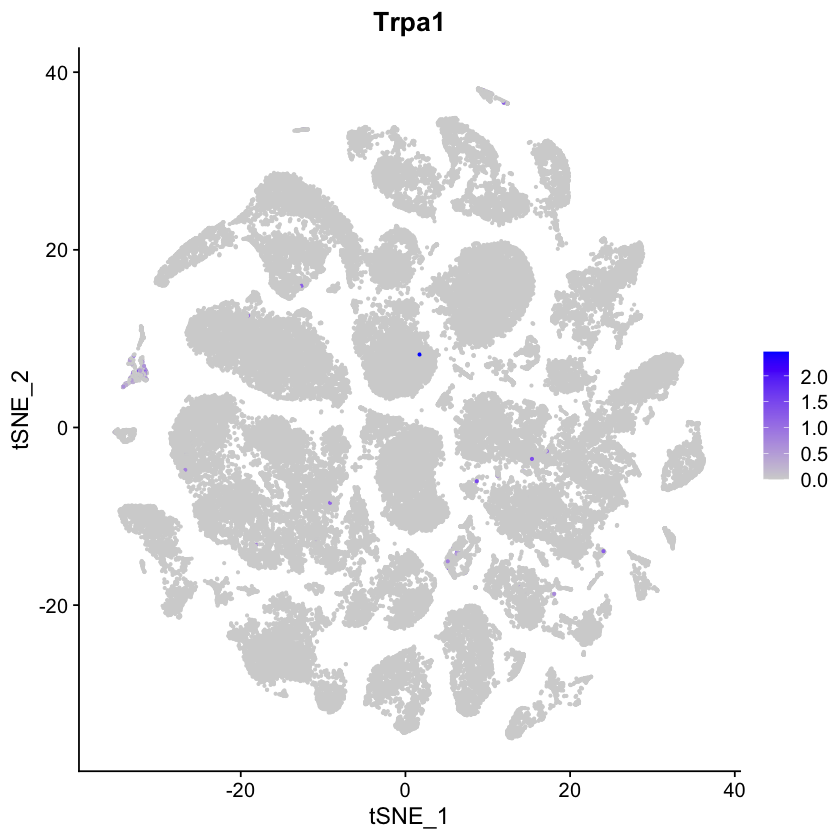

In [33]:
p <- FeaturePlot(seu, reduction = "tsne", features = c("Cd44", "Trpa1"), pt.size = 0.5,
    combine = FALSE)
p

Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.



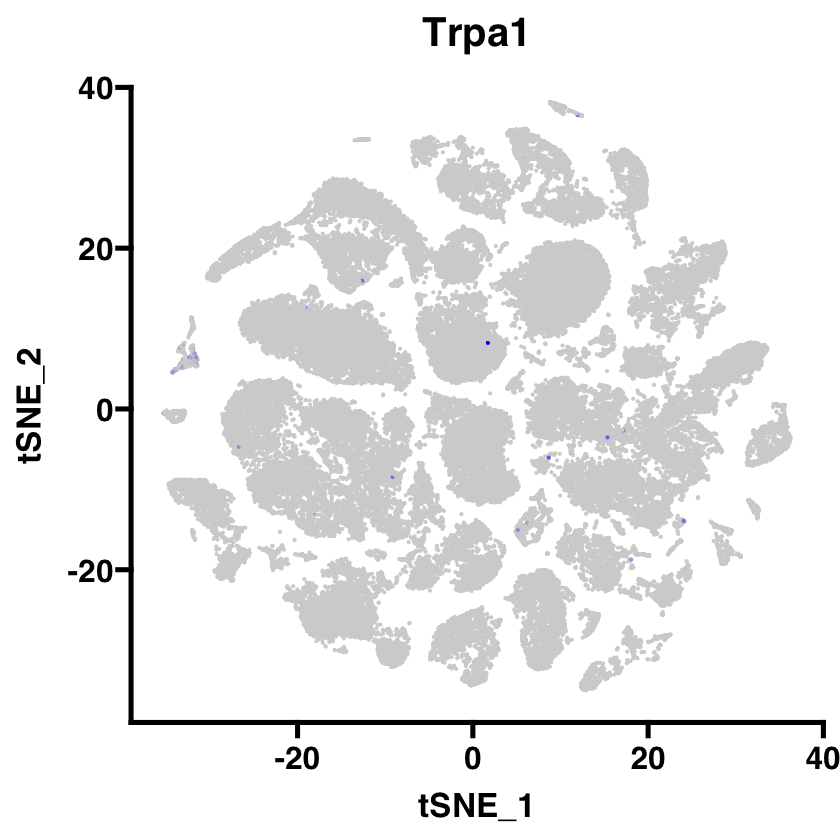

In [34]:
p[[2]] + theme_prism(base_size = 20) + NoLegend() + scale_x_continuous(limits = c(-39,
    40), expand = c(0, 0)) + scale_y_continuous(limits = c(-39, 40), expand = c(0,
    0))

##  Save figures 

In [44]:
ggsave(filename = "1.png", width = 12, height = 12, units = "in", dpi = 600)